In [1]:
import numpy as np
import pandas as pd
import json
import pickle
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create an empty dataframe and define its columns based on my data.
film_df = pd.DataFrame(columns=['actors','budget','countries','directors','genres','gross_usa','keywords',
                                  'languages', 'mpaa', 'rating', 'release_date', 'runtime',
                                   'title', 'votes', 'writers', 'year'])

In [3]:
#Import all my json files to create one big dataframe.
for i in range(1, 51):
    
    file = "../Desktop/film_data_files_json/film_data_" + str(i) + ".json"

    with open(file, "r") as f:
        data = f.read()
        
    temp_df = pd.DataFrame(json.loads(data))
    
    film_df = film_df.append(temp_df)

In [4]:
len(film_df)

49518

In [5]:
film_df.head()

,actors,budget,countries,directors,genres,gross_usa,keywords,languages,mpaa,rating,release_date,runtime,title,votes,writers,year
0,+_+Tom Selleck+_+Laura San Giacomo+_+Alan Rick...,"$20,000,000\n",+_+Australia+_+USA,+_+Simon Wincer,+_+Action+_+Adventure+_+Drama+_+Romance+_+Western,"$21,413,105\n",+_+long range rifle+_+australian aborigine+_+a...,+_+English+_+Aboriginal,PG-13,6.8,1990-10-19,119.0,Quigley Down Under (1990),"16,501",+_+John Hill,1990
1,+_+Kevin Costner+_+Mary McDonnell+_+Graham Gre...,"$22,000,000\n",+_+USA+_+UK,+_+Kevin Costner,+_+Adventure+_+Drama+_+Western,"$184,208,848\n",+_+friendship+_+soldier+_+19th century+_+honor...,+_+English+_+Sioux+_+Pawnee,PG-13,8.0,1990-11-21,181.0,Dances with Wolves (1990),"204,981",+_+Michael Blake+_+Michael Blake,1990
2,+_+Tony Todd+_+Patricia Tallman+_+Tom Towles+_...,"$4,200,000\n",+_+USA,+_+Tom Savini,+_+Horror,"$5,835,247\n",+_+biker+_+friends who live together+_+multipl...,+_+English,R,6.9,1990-10-19,92.0,Night of the Living Dead (1990),"33,738",+_+John A. Russo+_+George A. Romero,1990
3,+_+Susan Sarandon+_+James Spader+_+Jason Alexa...,None,+_+USA,+_+Luis Mandoki,+_+Drama+_+Romance,"$17,487,531\n",+_+older woman younger man relationship+_+love...,+_+English,R,6.5,1990-10-26,103.0,White Palace (1990),"6,480",+_+Glenn Savan+_+Ted Tally,1990
4,+_+Leo Fuchs+_+Eve Gordon+_+Lou Jacobi+_+Armin...,None,+_+USA,+_+Barry Levinson,+_+Drama,"$15,740,796\n",+_+trolley+_+suburb+_+baltimore maryland+_+nig...,+_+English+_+Yiddish,PG,7.3,1990-10-19,128.0,Avalon (1990),"5,115",+_+Barry Levinson,1990


In [6]:
#I won't use these columns because the data is pretty uninformative, so I will delete them.
del film_df['keywords']
del film_df['year']
del film_df['title']
del film_df['release_date']

In [7]:
#And drop null values.
film_df = film_df.dropna(how='any', axis=0)
film_df.reset_index(drop=True, inplace=True)

In [8]:
len(film_df)

4500

In [9]:
#Budget was imported as strings, so I am going to process it a bit and check the results.
film_df['budget'] = film_df['budget'].apply(lambda x: x.strip())
film_df = film_df[film_df['budget'].apply(lambda x: re.split(r'(\d+)', x)[0]  == '$')]
film_df.reset_index(drop=True, inplace=True)
film_df['budget'] = film_df['budget'].apply(lambda x: int(x.split('$')[1].replace(',', '')))
film_df['budget'].describe()

count    4.458000e+03
mean     3.588283e+07
std      4.139392e+07
min      1.600000e+03
25%      8.000000e+06
50%      2.200000e+07
75%      4.800000e+07
max      3.000000e+08
Name: budget, dtype: float64

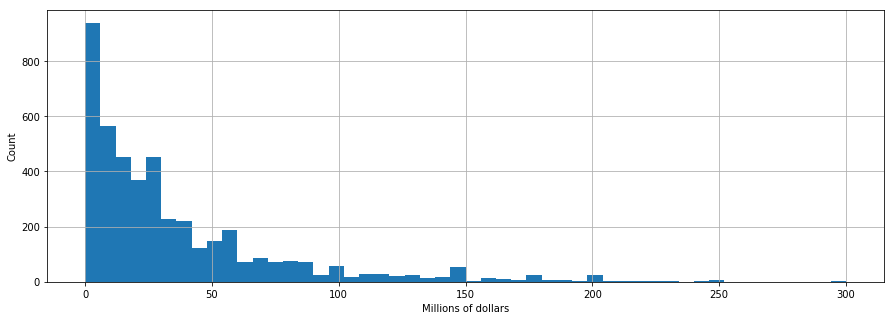

In [10]:
#Plotting the distribution
plt.figure(figsize=(15,5))
y = film_df['budget']/1000000
y.hist(bins = 50)
plt.xlabel('Millions of dollars')
plt.ylabel('Count');

In [11]:
#Do the same for USA Domestic Gross
film_df['gross_usa'] = film_df['gross_usa'].apply(lambda x: x.strip())
film_df = film_df[film_df['gross_usa'].apply(lambda x: re.split(r'(\d+)', x)[0]  == '$')]
film_df.reset_index(drop=True, inplace=True)
film_df['gross_usa'] = film_df['gross_usa'].apply(lambda x: int(x.split('$')[1].replace(',', '')))
film_df['gross_usa'].describe()

count    4.458000e+03
mean     4.499309e+07
std      6.788315e+07
min      0.000000e+00
25%      3.611954e+06
50%      2.133254e+07
75%      5.688982e+07
max      9.366622e+08
Name: gross_usa, dtype: float64

In [12]:
#There is a zero value there, so we will remove this row
film_df.loc[film_df['gross_usa'] == 0].index
film_df = film_df.drop(film_df.index[3588])
film_df['gross_usa'].describe()

count    4.457000e+03
mean     4.500318e+07
std      6.788742e+07
min      2.520000e+02
25%      3.626883e+06
50%      2.137006e+07
75%      5.693750e+07
max      9.366622e+08
Name: gross_usa, dtype: float64

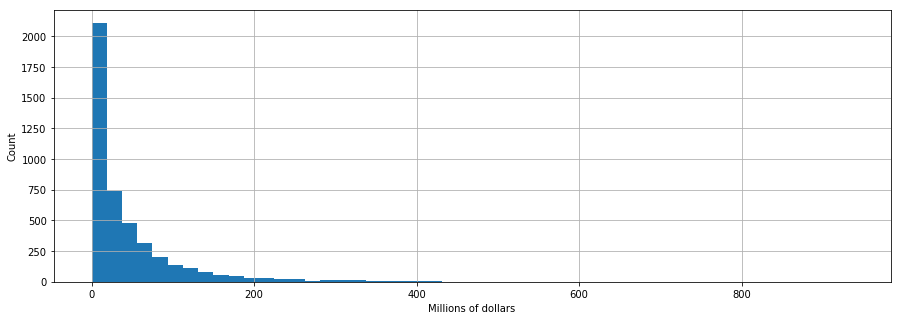

In [13]:
#Plotting the distribution
plt.figure(figsize=(15,5))
y = film_df['gross_usa']/1000000
y.hist(bins = 50)
plt.xlabel('Millions of dollars')
plt.ylabel('Count');

In [14]:
#Process votes, since they were imported as strings and need to be turned into integeres.
film_df['votes'] = film_df['votes'].str.replace(',','').apply(lambda x: int(x))
film_df['votes'].describe()

count    4.457000e+03
mean     9.257722e+04
std      1.530615e+05
min      6.000000e+00
25%      1.074200e+04
50%      3.929800e+04
75%      1.069520e+05
max      1.905683e+06
Name: votes, dtype: float64

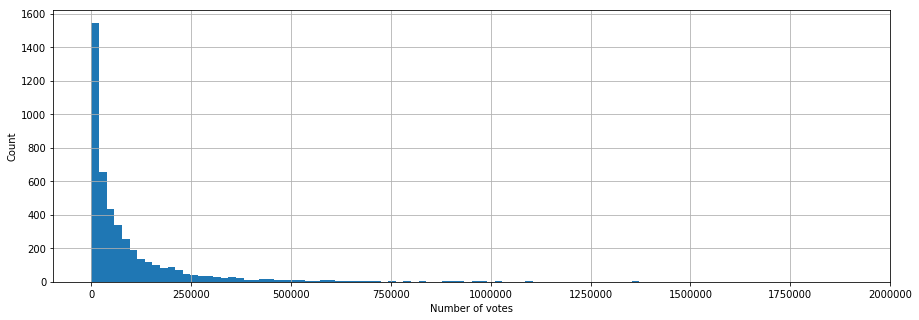

In [15]:
#Plotting the distribution
plt.figure(figsize=(15,5))
y = film_df['votes']
y.hist(bins = 100)
plt.xlabel('Number of votes')
plt.ylabel('Count');

In [16]:
#Check rating
film_df['rating'] = film_df['rating'].str.replace(',','').apply(lambda x: float(x))
film_df['rating'].describe()

count    4457.000000
mean        6.265492
std         1.028319
min         1.500000
25%         5.700000
50%         6.400000
75%         7.000000
max         9.300000
Name: rating, dtype: float64

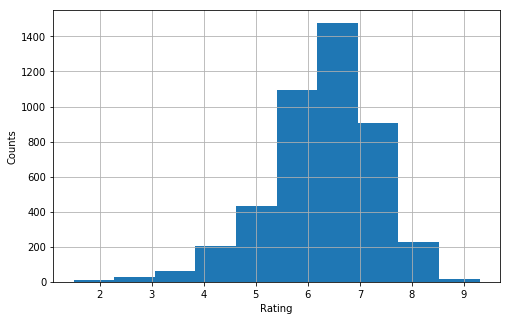

In [21]:
#Looks good, so I will plot its distribution.
plt.figure(figsize=(8,5))
y = film_df['rating']
y.hist(bins = 10)
plt.xlabel('Rating')
plt.ylabel('Counts');

## For categorical variables, I will unstack them in the corresponding notebooks in order not to overload my dataframe.

In [22]:
#Check if there are any empty strings for genres
film_df.loc[film_df['genres'] == ''].index

Int64Index([], dtype='int64')

In [23]:
#No, so now I will fix genres.
film_df['genres'] = film_df['genres'].apply(lambda x: str(x).split('+_+')[1:])

In [24]:
#Check mpaa
film_df.loc[film_df['mpaa'] == ''].index

Int64Index([], dtype='int64')

In [25]:
#Check languages
film_df.loc[film_df['languages'] == ''].index

Int64Index([], dtype='int64')

In [26]:
#Fix languages
film_df['languages'] = film_df['languages'].apply(lambda x: x.strip().split('+_+')[1:])

In [27]:
#Check directors
film_df.loc[film_df['directors'] == ''].index

Int64Index([3604], dtype='int64')

In [28]:
#Delete the empty line
film_df = film_df.drop(index = 3604).reset_index(drop=True)

In [29]:
#Check dataframe length
len(film_df)

4456

In [30]:
#Format directors and pick only the first one
film_df['directors'] = film_df['directors'].apply(lambda x: x.split('+_+')[1].replace(',', '')) 

In [34]:
#Look at the data to check if it looks ok.
film_df['directors'].value_counts().head()

Steven Soderbergh    23
Woody Allen          22
Clint Eastwood       21
Steven Spielberg     19
Ron Howard           17
Name: directors, dtype: int64

In [35]:
film_df['directors'].value_counts().tail()

Jason Hall      1
Chris Eyre      1
Mennan Yapo     1
Floyd Mutrux    1
Steve Race      1
Name: directors, dtype: int64

In [36]:
#Check writers
film_df.loc[film_df['writers'] == ''].index

Int64Index([658], dtype='int64')

In [37]:
#Drop the empty row
film_df = film_df.drop(index = 658).reset_index(drop=True)

In [38]:
#Process strings and pick the first value.
film_df['writers'] = film_df['writers'].apply(lambda x: x.split('+_+')[1].replace(',', '')) 

In [39]:
film_df['writers'].value_counts().head()

Woody Allen           22
Stephen King          15
Joel Coen             11
John Grisham          10
M. Night Shyamalan    10
Name: writers, dtype: int64

In [40]:
#Check for unique values.
film_df['writers'].nunique()

2868

In [41]:
#Get top-3 actors
film_df['actors'] = film_df['actors'].apply(lambda x: x.strip().split('+_+')[1:4])

In [42]:
#Work on countries.
film_df.loc[film_df['countries'] == ''].index

Int64Index([], dtype='int64')

In [37]:
film_df['countries'] = film_df['countries'].apply(lambda x: x.strip().split('+_+')[1:])

In [43]:
#Check the dataframe now.
film_df.head()

,actors,budget,countries,directors,genres,gross_usa,languages,mpaa,rating,runtime,votes,writers
0,"[Tom Selleck, Laura San Giacomo, Alan Rickman]",20000000,+_+Australia+_+USA,Simon Wincer,"[Action, Adventure, Drama, Romance, Western]",21413105,"[English, Aboriginal]",PG-13,6.8,119.0,16501,John Hill
1,"[Kevin Costner, Mary McDonnell, Graham Greene]",22000000,+_+USA+_+UK,Kevin Costner,"[Adventure, Drama, Western]",184208848,"[English, Sioux, Pawnee]",PG-13,8.0,181.0,204981,Michael Blake
2,"[Tony Todd, Patricia Tallman, Tom Towles]",4200000,+_+USA,Tom Savini,[Horror],5835247,[English],R,6.9,92.0,33738,John A. Russo
3,"[Jonathan Brandis, Kenny Morrison, Clarissa Burt]",36000000,+_+USA+_+Germany,George Miller,"[Adventure, Drama, Family, Fantasy]",17373527,[English],PG,5.1,90.0,20152,Karin Howard
4,"[David Andrews, Kelly Wolf, Stephen Macht]",10500000,+_+USA+_+Japan,Ralph S. Singleton,[Horror],11582891,[English],R,4.8,89.0,7824,Stephen King


In [44]:
len(film_df)

4455

In [45]:
#Store the data
pickle_out = open("processed_film_data","wb")
pickle.dump(film_df, pickle_out)
pickle_out.close()

In [46]:
pickle_in = open("processed_film_data","rb")
test_film_df = pickle.load(pickle_in)

In [47]:
test_film_df.head()

,actors,budget,countries,directors,genres,gross_usa,languages,mpaa,rating,runtime,votes,writers
0,"[Tom Selleck, Laura San Giacomo, Alan Rickman]",20000000,+_+Australia+_+USA,Simon Wincer,"[Action, Adventure, Drama, Romance, Western]",21413105,"[English, Aboriginal]",PG-13,6.8,119.0,16501,John Hill
1,"[Kevin Costner, Mary McDonnell, Graham Greene]",22000000,+_+USA+_+UK,Kevin Costner,"[Adventure, Drama, Western]",184208848,"[English, Sioux, Pawnee]",PG-13,8.0,181.0,204981,Michael Blake
2,"[Tony Todd, Patricia Tallman, Tom Towles]",4200000,+_+USA,Tom Savini,[Horror],5835247,[English],R,6.9,92.0,33738,John A. Russo
3,"[Jonathan Brandis, Kenny Morrison, Clarissa Burt]",36000000,+_+USA+_+Germany,George Miller,"[Adventure, Drama, Family, Fantasy]",17373527,[English],PG,5.1,90.0,20152,Karin Howard
4,"[David Andrews, Kelly Wolf, Stephen Macht]",10500000,+_+USA+_+Japan,Ralph S. Singleton,[Horror],11582891,[English],R,4.8,89.0,7824,Stephen King
